
# Generacion de Dataset


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 




# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

$$P_{rms}=\sqrt{\frac{1}{N}\sum\limits_{i=N}^N {x(i)}^2} $$

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing


# Cargar datos
Cargar los datos de entrenamiento.

In [ ]:
PATH_DATASET = "PS_20174392719_1491204439457_log.csv"

df = pd.read_csv(PATH_DATASET, delimiter=',')


In [90]:
# Look at the dataset
# df.info()
# df.isna().sum()   # No NaN

# See 'step' feature
# plt.figure()
# plt.plot(df['step'])
try:
    df = df.drop(['step'], axis=1)   # Step is strictly increasing timestamp. Remove since we will not analyze the dataset as time series.
    # Remove names since we must be able to identify fraud for new accounts that do not have a history (not analyzed as time series)
    df = df.drop(['nameOrig', 'nameDest'], axis=1)   
except:
    pass


print('Dataset size: ', df.shape)
print('Columns: ', df.columns.to_list())
print('Types', df['type'].unique())
fraud_count = df['isFraud'].sum()
print('Frauds: ', fraud_count, ' (', (100*fraud_count/df.shape[0]).round(2), '%)')

dum = pd.get_dummies(df['type'])
# TODO merge dummies to main dataframe
print(dum)


Dataset size:  (6362620, 8)
Columns:  ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
Types ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
Frauds:  8213  ( 0.13 %)
         CASH_IN  CASH_OUT  DEBIT  PAYMENT  TRANSFER
0              0         0      0        1         0
1              0         0      0        1         0
2              0         0      0        0         1
3              0         1      0        0         0
4              0         0      0        1         0
...          ...       ...    ...      ...       ...
6362615        0         1      0        0         0
6362616        0         0      0        0         1
6362617        0         1      0        0         0
6362618        0         0      0        0         1
6362619        0         1      0        0         0

[6362620 rows x 5 columns]


In [83]:
df.groupby('isFraud').describe()['oldbalanceOrg']

,count,mean,std,min,25%,50%,75%,max
isFraud,,,,,,,,
0,6354407.0,8.328287e+05,2.887144e+06,0.0,0.00,14069.00,106969.50,43818855.30
1,8213.0,1.649668e+06,3.547719e+06,0.0,125822.44,438983.45,1517771.48,59585040.37


<AxesSubplot:xlabel='isFraud,type'>

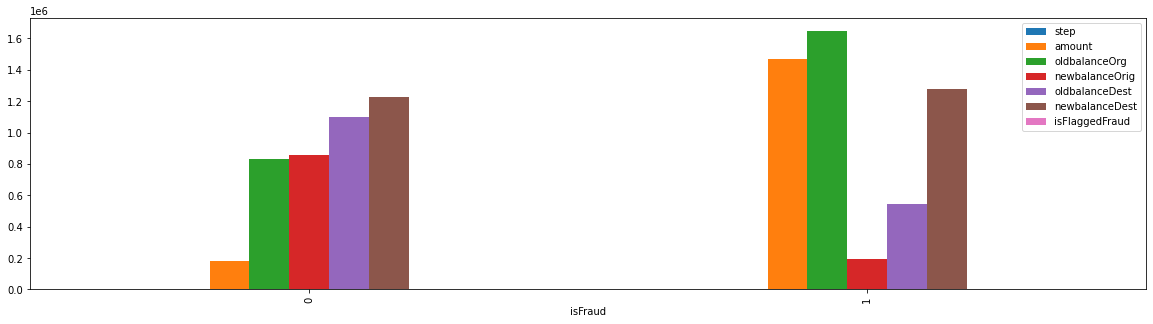

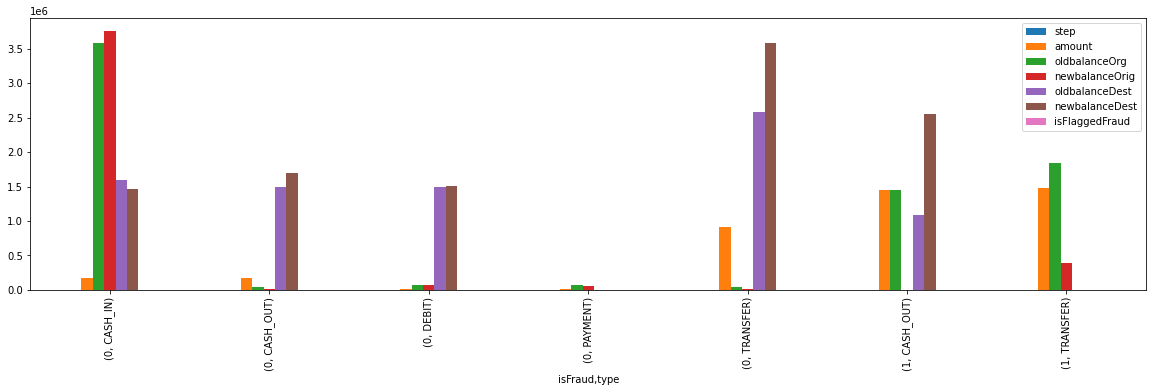

In [41]:
f_db = df.groupby('isFraud').mean()
f_db.plot(kind='bar', figsize=(20,5))
t_db = df.groupby(['isFraud', 'type']).mean()
t_db.plot(kind='bar', figsize=(20,5))


(array([1030601.,  480753., 1289783., 1179818., 1275418.,  754576.,
          71058.,  157033.,   54732.,   68848.]),
 array([  1. ,  75.2, 149.4, 223.6, 297.8, 372. , 446.2, 520.4, 594.6,
        668.8, 743. ]),
 <BarContainer object of 10 artists>)

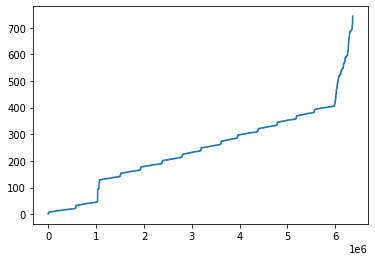

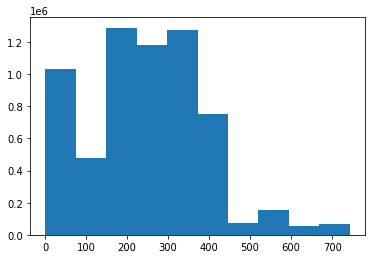

In [72]:
# sns.lineplot(data=df, x=range(df.shape[0]), y='step')